In [2]:
import pandas as pd
import yfinance as yf
import requests
import pandas_ta as ta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from termcolor import colored as cl
import math

plt.rcParams["figure.figsize"] = (20, 10)
plt.style.use("fivethirtyeight")

In [3]:
df = yf.download("NFLX", start="2015-01-01", end="2020-01-01").reset_index()

[*********************100%%**********************]  1 of 1 completed


In [4]:
df[["dcl", "dcm", "dcu"]] = df.ta.donchian(lower_length=20, upper_length=20)
df = df.dropna()
df = df.set_index("Date")
df.index = pd.to_datetime(df.index)

df

,Open,High,Low,Close,Adj Close,Volume,dcl,dcm,dcu
Date,,,,,,,,,
2015-01-30,63.132858,63.984287,62.655712,63.114285,63.114285,13215300,45.264286,55.302141,65.339996
2015-02-02,62.842857,63.428570,61.955715,63.009998,63.009998,12990600,45.264286,55.302141,65.339996
2015-02-03,63.320000,65.467140,62.730000,65.274284,65.274284,16440200,45.264286,55.365713,65.467140
2015-02-04,65.041428,65.174286,63.889999,64.101433,64.101433,12450900,45.264286,55.365713,65.467140
2015-02-05,64.541428,65.138573,63.665714,64.129997,64.129997,14248500,45.264286,55.365713,65.467140
...,...,...,...,...,...,...,...,...,...
2019-12-24,334.010010,335.700012,331.600006,333.200012,333.200012,2019300,292.019989,315.009995,338.000000
2019-12-26,334.600006,336.459991,332.010010,332.630005,332.630005,3589900,292.019989,315.009995,338.000000
2019-12-27,332.959991,333.820007,326.010010,329.089996,329.089996,5036100,292.019989,315.009995,338.000000


Text(0, 0.5, 'Close')

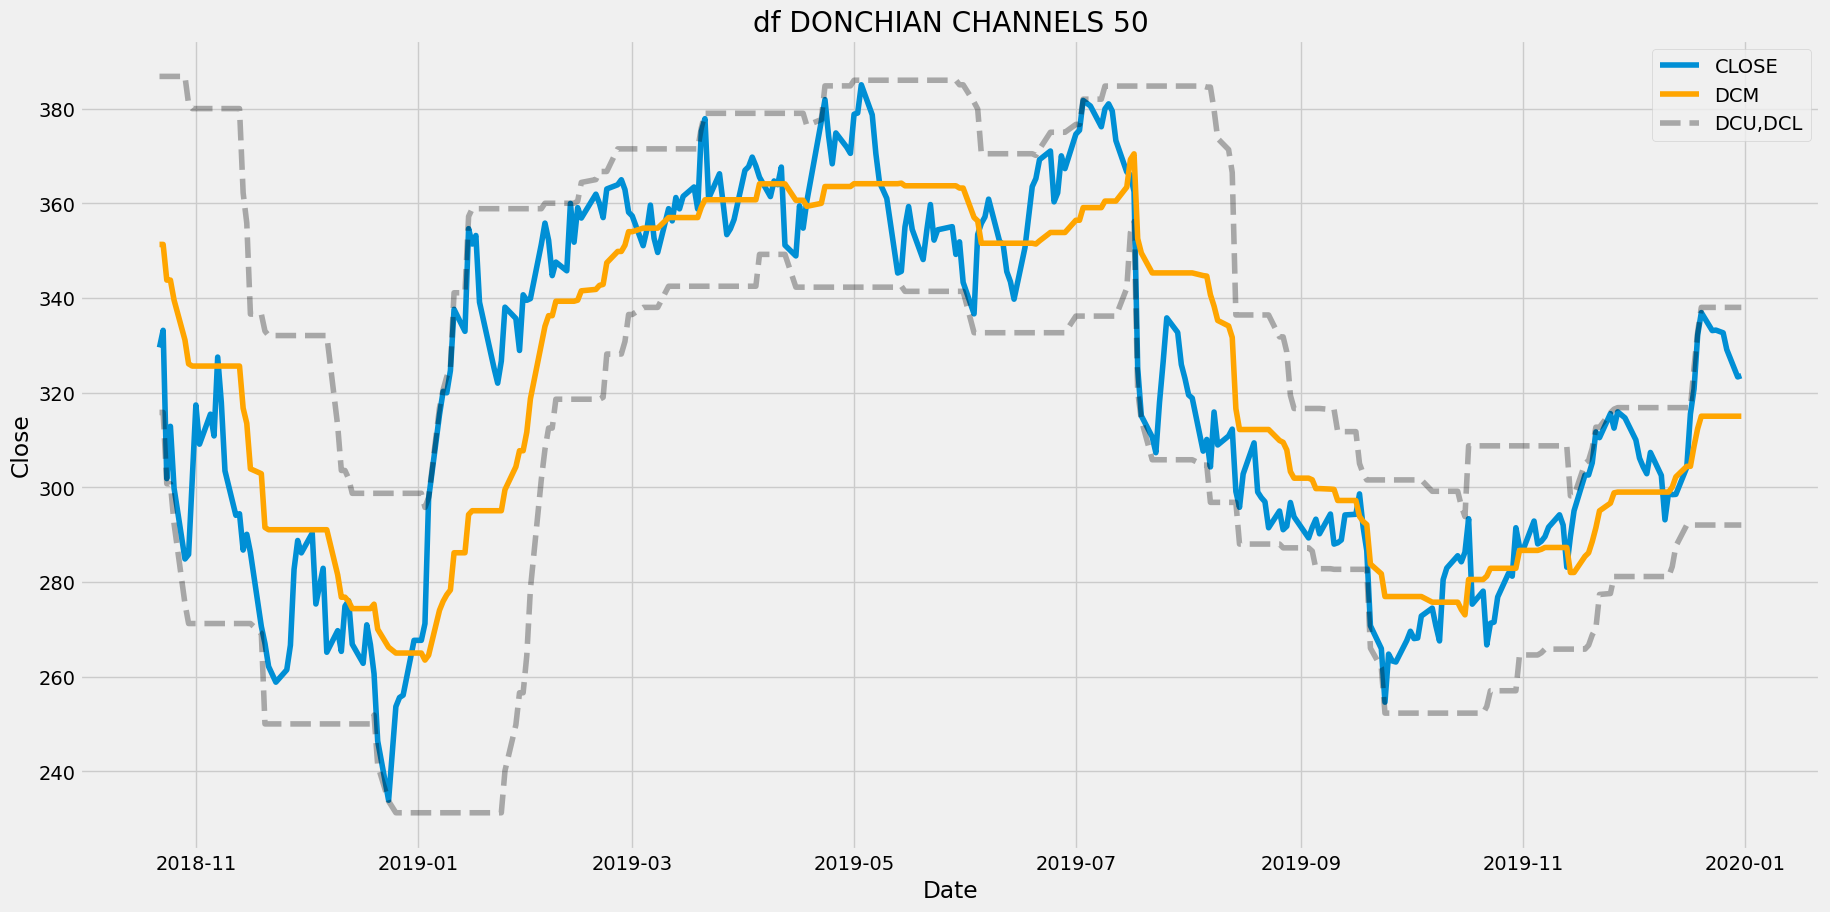

In [5]:
plt.plot(df[-300:].Close, label="CLOSE")
plt.plot(df[-300:].dcl, color="black", linestyle="--", alpha=0.3)
plt.plot(df[-300:].dcm, color="orange", label="DCM")
plt.plot(df[-300:].dcu, color="black", linestyle="--", alpha=0.3, label="DCU,DCL")
plt.legend()
plt.title("df DONCHIAN CHANNELS 50")
plt.xlabel("Date")
plt.ylabel("Close")

In [6]:
def implement_strategy(df, investment):

    in_position = False
    equity = investment

    for i in range(3, len(df)):
        if df["High"][i] == df["dcu"][i] and in_position == False:
            no_of_shares = math.floor(equity / df.Close[i])
            equity -= no_of_shares * df.Close[i]
            in_position = True
            # print(
            #     cl("BUY: ", color="green", attrs=["bold"]),
            #     f"{no_of_shares} Shares are bought at ${df.Close[i]} on {str(df.index[i])[:10]}",
            # )
        elif df["Low"][i] == df["dcl"][i] and in_position == True:
            equity += no_of_shares * df.Close[i]
            in_position = False
            # print(
            #     cl("SELL: ", color="red", attrs=["bold"]),
            #     f"{no_of_shares} Shares are bought at ${df.Close[i]} on {str(df.index[i])[:10]}",
            # )
    if in_position == True:
        equity += no_of_shares * df.Close[i]
        # print(
        #     cl(
        #         f"\nClosing position at {df.Close[i]} on {str(df.index[i])[:10]}",
        #         attrs=["bold"],
        #     )
        # )
        in_position = False

    earning = round(equity - investment, 2)
    roi = round(earning / investment * 100, 2)
    print(cl(f"EARNING: ${earning} ; ROI: {roi}%", attrs=["bold"]))
    return roi
    


implement_strategy(df, 100000)

EARNING: $214991.72 ; ROI: 214.99%


214.99

In [8]:
from scipy.optimize import brute

# Define ranges for periods
ranges = (slice(1, 50, 1), slice(1, 50, 1))


def fitness_func(lengths, df, investment):
    lower_length, upper_length = lengths
    lower_length, upper_length = int(lower_length), int(upper_length)

    df[["dcl", "dcm", "dcu"]] = df.ta.donchian(
        lower_length=lower_length, upper_length=upper_length
    )
    df = df.dropna()

    # Implement strategy and calculate ROI
    roi = implement_strategy(df, investment)
    return -roi  # Negate ROI because brute() minimizes the function

solution = brute(
    lambda lengths: fitness_func(lengths, df, 100000*0.23),
    ranges,
    full_output=True,
    finish=None,
)

print("Parameters of the best solution : {solution}".format(solution=solution[0]))

EARNING: $19784.11 ; ROI: 86.02%
EARNING: $28922.57 ; ROI: 125.75%
EARNING: $15784.43 ; ROI: 68.63%
EARNING: $7366.89 ; ROI: 32.03%
EARNING: $-120.34 ; ROI: -0.52%
EARNING: $-735.59 ; ROI: -3.2%
EARNING: $-539.6 ; ROI: -2.35%
EARNING: $14306.55 ; ROI: 62.2%
EARNING: $7813.86 ; ROI: 33.97%
EARNING: $1609.93 ; ROI: 7.0%
EARNING: $6310.44 ; ROI: 27.44%
EARNING: $8864.78 ; ROI: 38.54%
EARNING: $14655.87 ; ROI: 63.72%
EARNING: $14023.64 ; ROI: 60.97%
EARNING: $14515.6 ; ROI: 63.11%
EARNING: $13637.95 ; ROI: 59.3%
EARNING: $14291.03 ; ROI: 62.13%
EARNING: $14706.91 ; ROI: 63.94%
EARNING: $14962.03 ; ROI: 65.05%
EARNING: $12042.61 ; ROI: 52.36%
EARNING: $11758.67 ; ROI: 51.12%
EARNING: $9474.71 ; ROI: 41.19%
EARNING: $8811.09 ; ROI: 38.31%
EARNING: $4182.93 ; ROI: 18.19%
EARNING: $6640.07 ; ROI: 28.87%
EARNING: $3043.39 ; ROI: 13.23%
EARNING: $2511.88 ; ROI: 10.92%
EARNING: $2003.74 ; ROI: 8.71%
EARNING: $3392.91 ; ROI: 14.75%
EARNING: $3392.91 ; ROI: 14.75%
EARNING: $3130.74 ; ROI: 13.61%
EA

In [9]:
df = yf.download("NFLX", start="2015-01-01", end="2020-01-01").reset_index()
df[["dcl", "dcm", "dcu"]] = df.ta.donchian(lower_length=solution[0][0], upper_length=solution[0][1])
df = df.dropna()
df = df.set_index("Date")
df.index = pd.to_datetime(df.index)

[*********************100%%**********************]  1 of 1 completed


In [10]:
implement_strategy(df, 1000000*0.23)

EARNING: $2077644.23 ; ROI: 903.32%


903.32

In [10]:
df["Close"][-1] / df["Close"][0]

6.922340974230742